# Lab 2 - Classification and Fitting with Neural Networks in Tensorflow


In this notebook, you will be introduced to tensorflow. We will

-  perform function fitting with neural networks (Part A)
-  perform classification on handwritten digits using Tensorflow (Part B)

Complete the code where appropriate according to the instructions (see comments)

Your are free to tweak the hyper-parameters (including number of hidden units, number of hidden layers, learning rate, num of iterations and so on) to improve the performance of the model. 

Make sure that your final submission is a notebook that can be run from beginning to end

For Part A: You should try to get pretty close to the ground truth function where requested. 

For Part B: The submitted prediction accuracy on testing set, should be > 60%. It is in fact easy to achieve >95% of the accuracy on this dataset with careful tuning of hyper-parameters. **Your grade will depend on the final prediction accuracy**. 

In [1]:
import tensorflow as tf
from collections import deque
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
tf.__version__ # Make sure you have version >2

'2.8.0'

# Short Experiments with Tensors
No Code is necessary in this section

In [3]:
# Let's create a random tensor 
t = tf.random.uniform([2,3],-1,3)
t # t.shape -> (2,3)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.6439581 , -0.53451014,  2.9792442 ],
       [-0.09752512, -0.19955397,  2.8112226 ]], dtype=float32)>

In [4]:
5*(t**2+10) # Tensor arithmetic

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[63.512993, 51.428505, 94.379486],
       [50.047554, 50.19911 , 89.51486 ]], dtype=float32)>

In [5]:
t.numpy() # convert to numpy

array([[ 1.6439581 , -0.53451014,  2.9792442 ],
       [-0.09752512, -0.19955397,  2.8112226 ]], dtype=float32)

# Part A: Function fitting using Neural Networks 

## Fit a Simple Linear Function
- No need to change anything in this subsection
- Read the code and understand what is happening

- In this part you will see how to use tensorflow to implement a simple linear regression 

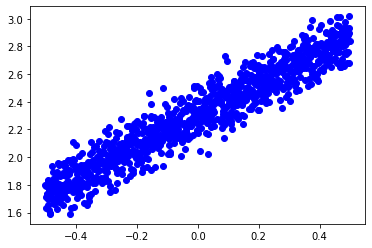

In [6]:
# No code changes are necessary here but feel free to experiment
true_a = 1.13
true_b = 2.3
datapoints =  1000
noise_intensity = 0.1
data_x = (np.arange(datapoints) / (datapoints) - .5).astype(np.float32) # Chainer assumes all the cpu computation is done in float32
data_y = (data_x * true_a + true_b + np.random.randn(*data_x.shape) * noise_intensity).astype(np.float32)
_ = plt.scatter(data_x, data_y, c='b')

In [7]:
from tensorflow.keras import Input
from tensorflow.keras import layers,Model

model = tf.keras.Sequential()
model.add(layers.Dense(1,input_shape=[1])) # no activation function here

In [8]:
model.compile(optimizer="Adam", loss="mse")
# NOTE during your experimentation you can use verbose=1 or 2, but for final result you can use verbose=0
history = model.fit(data_x,data_y,epochs=250,verbose=0) 

In [9]:
model.layers # Observe the layers

In [10]:
model.layers[0].weights # Observe the weights learned

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.1206073]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([2.3042548], dtype=float32)>]

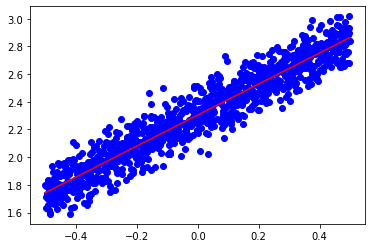

In [11]:
plt.scatter(data_x, data_y, c='b')
plt.plot(data_x, model.predict(data_x).T[0],c='r')

## Fit a nonlinear function using Neural Networks 

- In this part you will write code that fits the dataset below.
- The ground truth is a sinusoidal function but there is noise added
- you should implement a slightly more complicated model than before. 

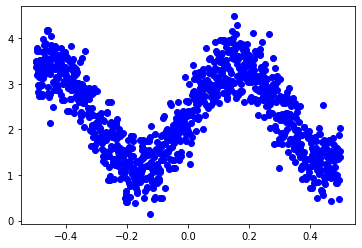

In [12]:
# no need to change anything here
# this generates the data
freq = 10
noise_intensity = 0.4
data_y2 = ( np.sin(freq*data_x) * true_a + true_b + np.random.randn(*data_x.shape) * noise_intensity).astype(np.float32)
_ = plt.scatter(data_x, data_y2, c='b')

- implement the neural network model in the following cell
- to do that you can experiment with various methods. You can try to put more than one layers. Experiment with the number of parameters per layer as well. 
- you will need to use some activation function to introduce nonlinearity in your neural network. 
- to introduce nonlinearity you can use the parameter activation="relu" in a Dense layer for example. There are other activation functions you can try as well

In [42]:
# TODO Make a nonlinear model to fit the nonlinear function

model = tf.keras.Sequential() 
model.add(layers.Dense(16,activation="relu",input_shape=[1]))
model.add(layers.Dense(32,activation="relu",input_shape=[16]))
model.add(layers.Dense(1,input_shape=[32]))
model.compile(optimizer="Adam", loss="mse")

In [43]:
history = model.fit(data_x,data_y2,epochs=250,verbose=0) # fit your model

In [44]:
model.layers # Notice how many dense layers we have now

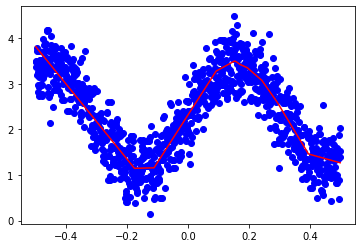

In [45]:
# overlay answer and data
# NOTE: your result should be close to the ground truth function (sinusoidal function)
plt.scatter(data_x, data_y2, c='b')
plt.plot(data_x, model.predict(data_x).T[0],c='r')  

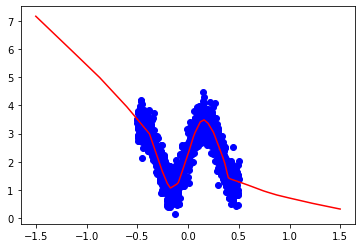

In [40]:
# How does your model extrapolate? 
# -> It's okay if it doesn't extrapolate
plt.scatter(data_x, data_y2, c='b')
plt.plot(data_x-1, model.predict(data_x-1).T[0],c='r') 
plt.plot(data_x, model.predict(data_x).T[0],c='r') 
plt.plot(data_x+1, model.predict(data_x+1).T[0],c='r') 

In [ ]:
# OPTIONAL Question 
# - Create your dataset based on teh function of your choice (logarithmic, root, exponential etc)
# - Your dataset for X can be different than a uniform grid, say for example uniform distribution, normal distribution etc
# - does your model interpolate well? does it extrapolate well?

# Part B: Classification using Neural Networks

In this part we build a model for image classification. 
We will use the MNIST hand written digit dataset, which is a toy benchmark for image
classification models. First load the dataset via TensorFlow API.

Here $X_{train},Y_{train}$ denote the training data and $X_{test},Y_{test}$ denote the testing data. We train the model on training set and evaluate its performance on testing set (to evaluate potential under-fitting or over-fitting). As can be seen below, $X_{train}$ contains a lot of examples with $28 \times 28 $ pixels. $Y_{train}$ contains the corresponding labels (i.e. the $10$ classes). 

In [46]:
mnist = tf.keras.datasets.mnist.load_data(path="mnist.npz") # Dataset

11501568/11490434 [==============================] - 0s 0us/step


In [47]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

In [48]:
X_train = X_train/255.0 # Normalize your data
X_test  = X_test/255.0 

5


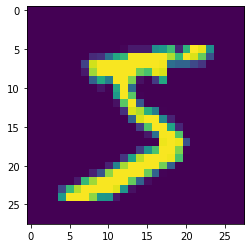

In [49]:
# Print an image and its label
plt.imshow(X_train[0])
print(Y_train[0])

In [54]:
# TODO: Create a simple Model to predict the label of a digit with one dense layer

model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape=[28,28]))
model.add(layers.Dense(10,activation='softmax',input_shape=[28*28]))
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy",metrics=['accuracy'])
history = model.fit(X_train,Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4729 - accuracy: 0.8757
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3040 - accuracy: 0.9143
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2835 - accuracy: 0.9198
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.9239
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9260
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2622 - accuracy: 0.9269
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2582 - accuracy: 0.9286
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2556 - accuracy: 0.9297
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2530 - accuracy: 0.9298
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.251

In [55]:
model.evaluate(X_test,Y_test) # Evaluate your results

313/313 [==============================] - 1s 2ms/step - loss: 0.2656 - accuracy: 0.9267


[0.2655634880065918, 0.9266999959945679]

In [56]:
# TODO: Create a more complicated model with more than one layers
# and evaluate your model on the test set
# try to improve the performance compared to the previous model

model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape=[28,28]))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy",metrics=['accuracy'])
history = model.fit(X_train,Y_train, epochs=10)
model.evaluate(X_test,Y_test)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2274 - accuracy: 0.9336
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0930 - accuracy: 0.9726
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0617 - accuracy: 0.9803
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0434 - accuracy: 0.9862
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0326 - accuracy: 0.9898
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0251 - accuracy: 0.9921
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0194 - accuracy: 0.9940
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0155 - accuracy: 0.9952
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0136 - accuracy: 0.9955
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.010

In [57]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0779 - accuracy: 0.9804


[0.07790808379650116, 0.980400025844574]

In [ ]:
# Optional question
# Identify digits that your model mispredicts, and display them. 